# Ablation of Latent Space in Appendix (Figure 9)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import utils

In [2]:
plt.rcParams["font.size"] = 32
plt.rcParams["legend.fontsize"] = 32
plt.rcParams["legend.loc"] = "lower right"

In [3]:
COLORS = {
    "Deterministic-MSE": "#ff7f00",
    "FSQ-MSE": "#e41a1c",
    "Gaussian": "#377eb8",
    "GMM-Rsample-NLL": "green",
    "DCWM": "#984ea3",
}
AGENTS = {
    "Deterministic-MSE": "MSE",
    "FSQ-MSE": "FSQ+MSE.",
    "Gaussian": "Gaussian+log-lik",
    "GMM-Rsample-NLL": "GMM+log-lik.",
    "DCWM": "FSQ+log-lik. (ours)",
}
main_envs = [
    "dog-run",
    "dog-walk",
    "humanoid-walk",
    "mw-assembly",
]
YLABELS = {"episode_reward": "Episode Return"}

Load results of DC-MPC and baselines.

In [4]:
df = pd.read_csv("../data/ablations/latent-space-cont-stoch.csv")

In [5]:
df

,agent,env,env_step,episode_reward,episode_success,seed
0,Deterministic-MSE,walker-walk,1000.0,27.254423,NaN,0
1,Deterministic-MSE,walker-walk,26000.0,92.163048,NaN,0
2,Deterministic-MSE,walker-walk,51000.0,614.951843,NaN,0
3,Deterministic-MSE,walker-walk,76000.0,919.941345,NaN,0
4,Deterministic-MSE,walker-walk,101000.0,793.012390,NaN,0
...,...,...,...,...,...,...
26269,DCWM,dog-run,3126000.0,632.805847,NaN,1
26270,DCWM,dog-run,3151000.0,625.720886,NaN,1
26271,DCWM,dog-run,3176000.0,636.775879,NaN,1
26272,DCWM,dog-run,3201000.0,610.310913,NaN,1


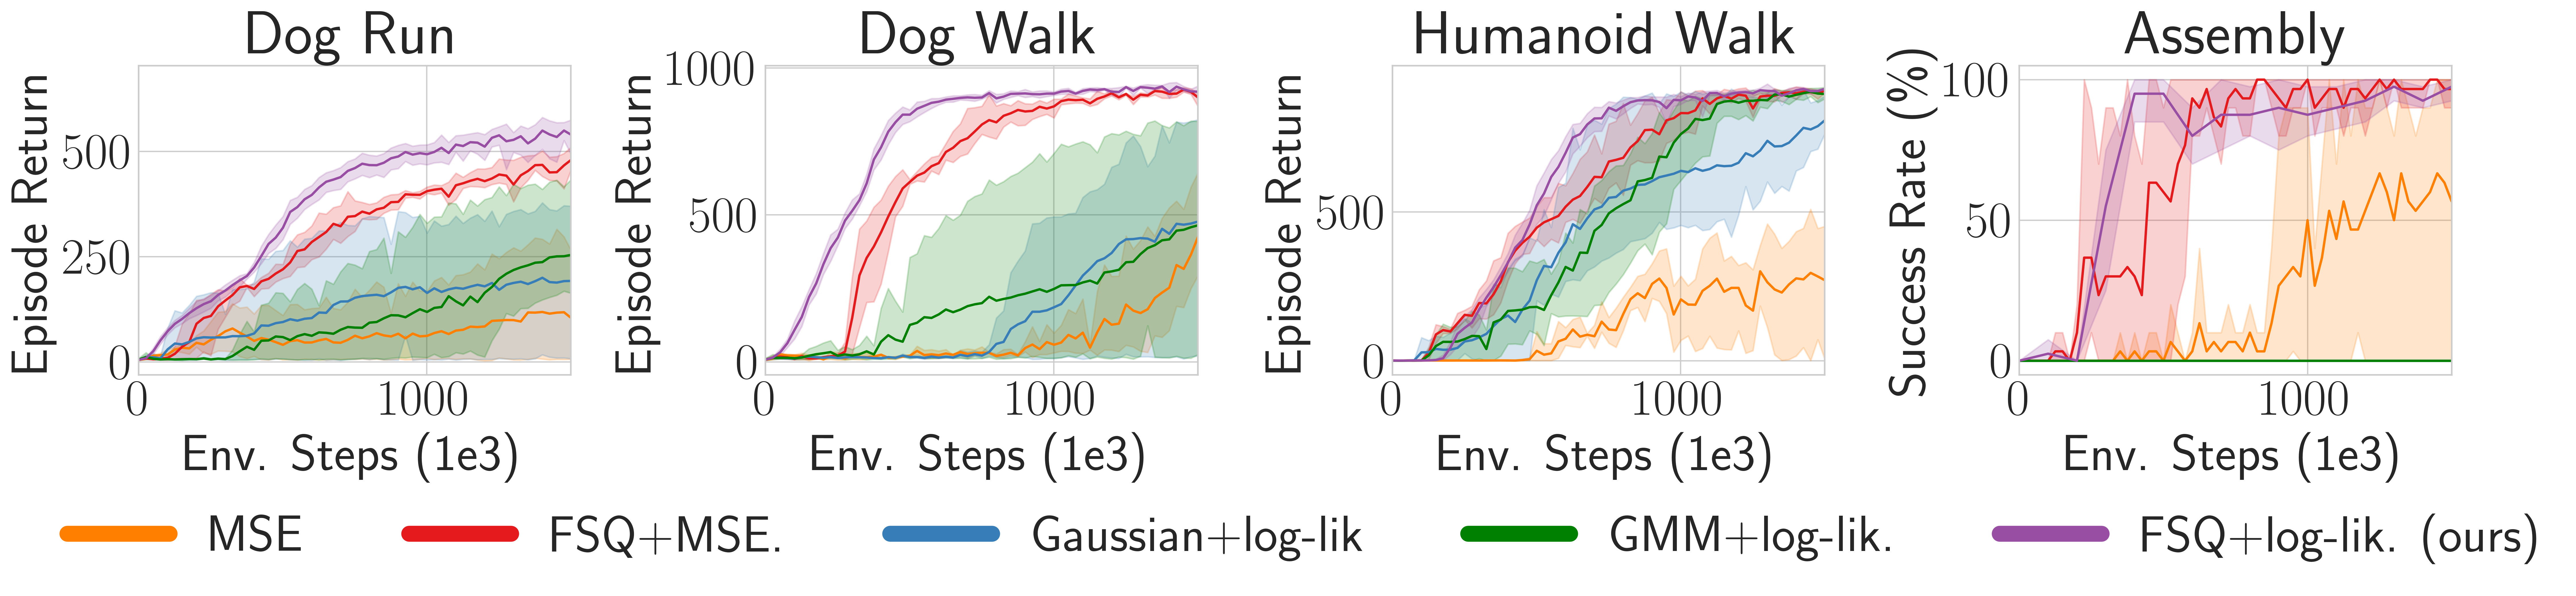

In [6]:
def plot(df):
    ncol = 4
    nrow = 1
    fig, axs = plt.subplots(
        nrow,
        ncol,
        figsize=(6.5 * ncol, 3.5 * nrow),
    )
    df["env_step"] = df.apply(lambda row: int(row["env_step"] / 1000), axis=1)
    df["episode_success"] = df.apply(lambda row: row["episode_success"] * 100, axis=1)

    df = df[df["agent"].isin(AGENTS.keys())]

    color_mapping = COLORS
    for ind, env in enumerate(main_envs):
        row = ind // ncol
        col = ind % ncol

        data = df[df["env"] == env]
        ax = axs[col]
        # if ind == 3:
        #     ax = axs[3].twinx()

        legend = True if ind == len(main_envs) - 2 else False
        if not "mw" in env:
            g = sns.lineplot(
                x="env_step",
                y="episode_reward",
                data=data,
                errorbar=("ci", 95),
                hue="agent",
                palette=color_mapping,
                legend="auto" if legend else None,
                ax=ax,
            )
        else:
            g = sns.lineplot(
                x="env_step",
                y="episode_success",
                data=data,
                errorbar=("ci", 95),
                hue="agent",
                palette=color_mapping,
                legend="auto" if legend else None,
                ax=ax,
            )
        g.set_xlim(0, 1500)

        ax.set_title(" ".join([ele.capitalize() for ele in env.replace("mw", "").split("-")]))

        ax.set_xlabel("Env. Steps (1e3)")
        ax.set_ylabel("")

        ax.set_ylabel("Episode Return")
    axs[-1].set_ylabel("Success Rate (\%)")
    axs[-1].set_xlabel("Env. Steps (1e3)")

    handles, previous_labels = axs[-2].get_legend_handles_labels()
    l = axs[-2].legend(
        loc="upper center",
        bbox_to_anchor=(-0.2, -0.3),
        fancybox=False,
        shadow=False,
        ncol=len(AGENTS),
        handles=handles,
        labels=[AGENTS[k] for k in previous_labels],
    )
    for line in l.get_lines():
        line.set_linewidth(10.0)

    plt.subplots_adjust(wspace=0.45)  # Adjust the bottom to make space for the legend

    plt.savefig(f"./figs/latent-space-ablation-cont-stoch.pdf", bbox_inches="tight")

plot(df)